# Zipline Backtesting

#### COPYRIGHT QUANT SCIENCE UNIVERSITY
#### Goal: Get you started making progress with backtesting
****

## ENVIRONMENT INSTRUCTIONS WITH CONDA:

Use these command line scripts to create a zipline_backtesting environment with the necessary python libraries to complete this tutorial.

``` bash
conda create -n zipline_backtesting
conda activate zipline_backtesting
conda install python
pip install zipline-reloaded numpy==1.26.4 plotly nbformat
```

In [2]:
# IMPORTS
from zipline.api import order_target, record, symbol
from zipline import run_algorithm
from zipline.data import bundles

import pandas as pd
import plotly.express as px
import os

import warnings

# Suppress specific FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning, message=".*fillna.*")
warnings.filterwarnings("ignore", category=FutureWarning, message=".*Series.__setitem__.*")

## STEP 1: INGEST A DATA BUNDLE

* ONLY NEED TO RUN THIS ONCE.
* THIS BUILDS THE QUANDL FREE DATA UP TO 2018. 
* Instructions: https://docs.data.nasdaq.com/v1.0/docs/getting-started

In [ ]:
os.environ["QUANDL_API_KEY"] = "YOUR_API_KEY"
bundle = "quandl"
bundles.ingest(bundle)

## STEP 2: CREATE A TRADING STRATEGY

In [5]:
def initialize(context):
    # Define the stock to trade
    context.asset = symbol('AAPL')
    
    # Set the historical windows
    context.short_window = 7
    context.long_window = 20

def handle_data(context, data):
    # Get historical data
    short_mavg = data.history(context.asset, 'price', context.short_window, '1d').mean()
    long_mavg = data.history(context.asset, 'price', context.long_window, '1d').mean()

    # Trading logic
    if short_mavg > long_mavg:
        # Buy signal
        order_target(context.asset, 100)
    else:
        # Sell signal
        order_target(context.asset, 0)
    
    # Record the moving averages for later analysis
    record(
        short_mavg=short_mavg, 
        long_mavg=long_mavg, 
        price=data.current(context.asset, 'price')
    )

## STEP 3: MAKE THE BASIC BACKTEST

In [6]:
# Define the backtest parameters
start = pd.Timestamp('2016-01-01')
end = pd.Timestamp('2017-12-31')
capital_base = 10000

# Run the algorithm
result = run_algorithm(
    start=start, 
    end=end, 
    initialize=initialize,
    handle_data=handle_data, 
    capital_base=capital_base,
    bundle='quandl'
)

In [7]:
result

,period_open,period_close,returns,starting_exposure,short_exposure,starting_value,starting_cash,long_exposure,ending_value,portfolio_value,...,trading_days,benchmark_period_return,benchmark_volatility,algo_volatility,alpha,beta,period_label,max_drawdown,excess_return,sharpe
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.000000,0.0,0.0,0.0,10000.000,0.0,0.0,10000.000,...,1,0.0,NaN,NaN,None,None,2016-01,0.000000,0.0,NaN
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,0.000000,0.0,0.0,0.0,10000.000,0.0,0.0,10000.000,...,2,0.0,0.0,0.000000,None,None,2016-01,0.000000,0.0,NaN
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,0.000000,0.0,0.0,0.0,10000.000,0.0,0.0,10000.000,...,3,0.0,0.0,0.000000,None,None,2016-01,0.000000,0.0,NaN
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,0.000000,0.0,0.0,0.0,10000.000,0.0,0.0,10000.000,...,4,0.0,0.0,0.000000,None,None,2016-01,0.000000,0.0,NaN
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,0.000000,0.0,0.0,0.0,10000.000,0.0,0.0,10000.000,...,5,0.0,0.0,0.000000,None,None,2016-01,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.000000,17501.0,0.0,17501.0,-852.662,17501.0,17501.0,16648.338,...,499,0.0,0.0,0.146987,None,None,2017-12,-0.099377,0.0,1.824965
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-0.026669,17501.0,0.0,17501.0,-852.662,17057.0,17057.0,16204.338,...,500,0.0,0.0,0.148153,None,None,2017-12,-0.099377,0.0,1.716246
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.000185,17057.0,0.0,17057.0,-852.662,17060.0,17060.0,16207.338,...,501,0.0,0.0,0.148006,None,None,2017-12,-0.099377,0.0,1.715151
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.002962,17060.0,0.0,17060.0,-852.662,17108.0,17108.0,16255.338,...,502,0.0,0.0,0.147865,None,None,2017-12,-0.099377,0.0,1.723425


## STEP 4: PLOT THE PERFORMANCE

In [8]:
# Plot the performance
px.line(
    result.portfolio_value, 
    title = 'Portfolio Value Over Time',
    template='simple_white'
)

![Portfolio Performance](img/portfolio_performance.png)

/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/plotting.py:670: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '26.829%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Start date,2016-01-04
End date,2017-12-29
Total months,23
,Backtest
Annual return,26.829%
Cumulative returns,60.703%
Annual volatility,14.798%
Sharpe ratio,1.68
Calmar ratio,2.70
Stability,0.91
Max drawdown,-9.938%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.94,2016-04-14,2016-07-26,2016-08-08,83
1,8.01,2016-08-15,2016-12-05,2017-01-09,106
2,7.81,2017-11-09,2017-12-29,NaT,NaN
3,7.03,2017-05-12,2017-06-12,2017-08-08,63
4,3.72,2017-08-09,2017-08-10,2017-08-15,5


/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/plotting.py:1407: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Stress Events,mean,min,max
New Normal,0.10%,-3.95%,6.10%


Top 10 long positions of all time,max
sid,
AAPL,105.31%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,105.31%


/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/pos.py:100: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/pos.py:101: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/plotting.py:323: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/Users/mdancho/opt/anaconda3/envs/zipline_backtesting/lib/python3.12/site-packages/pyfolio/plotting.py:1465: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



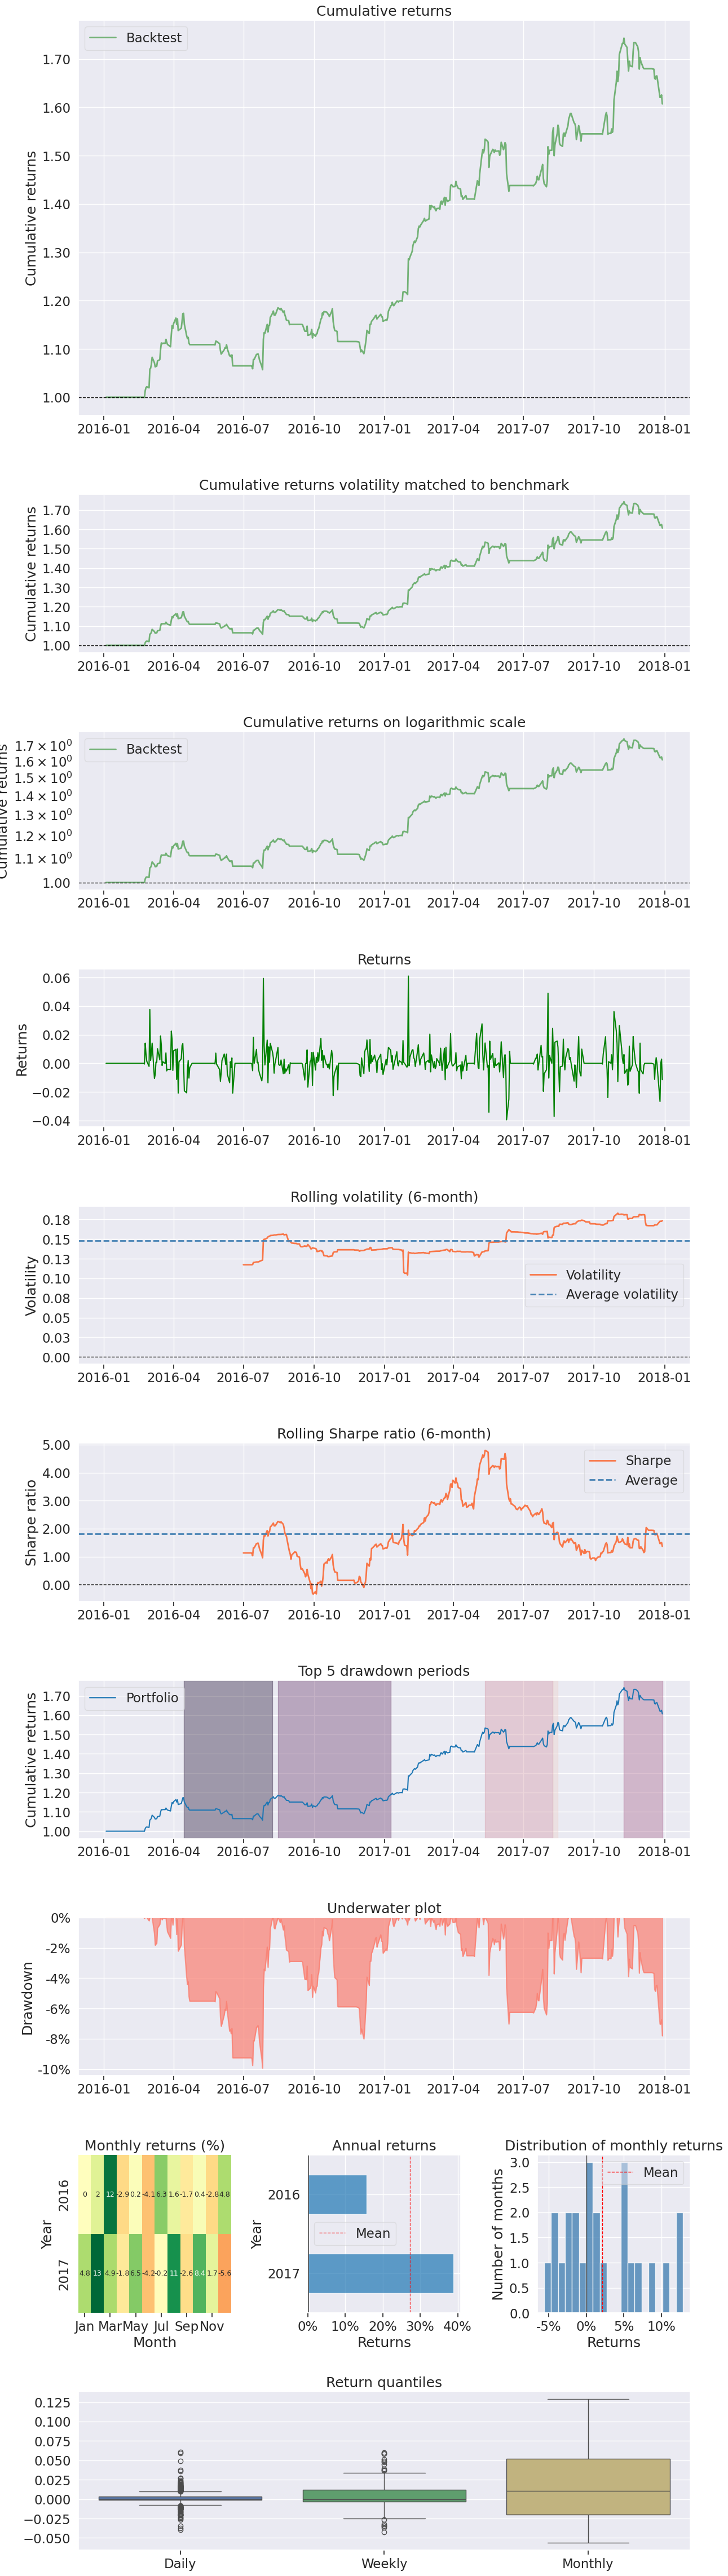

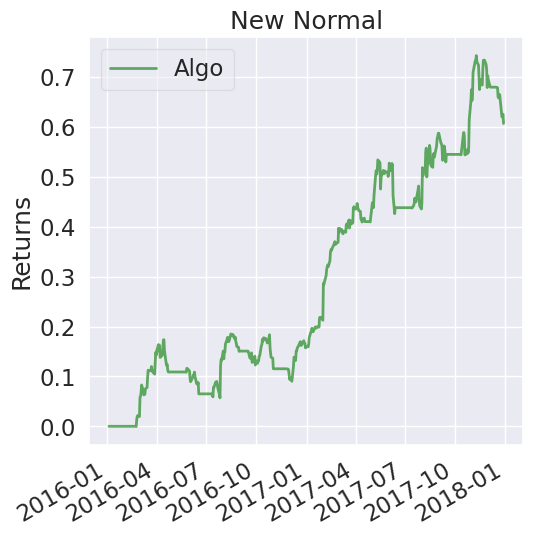

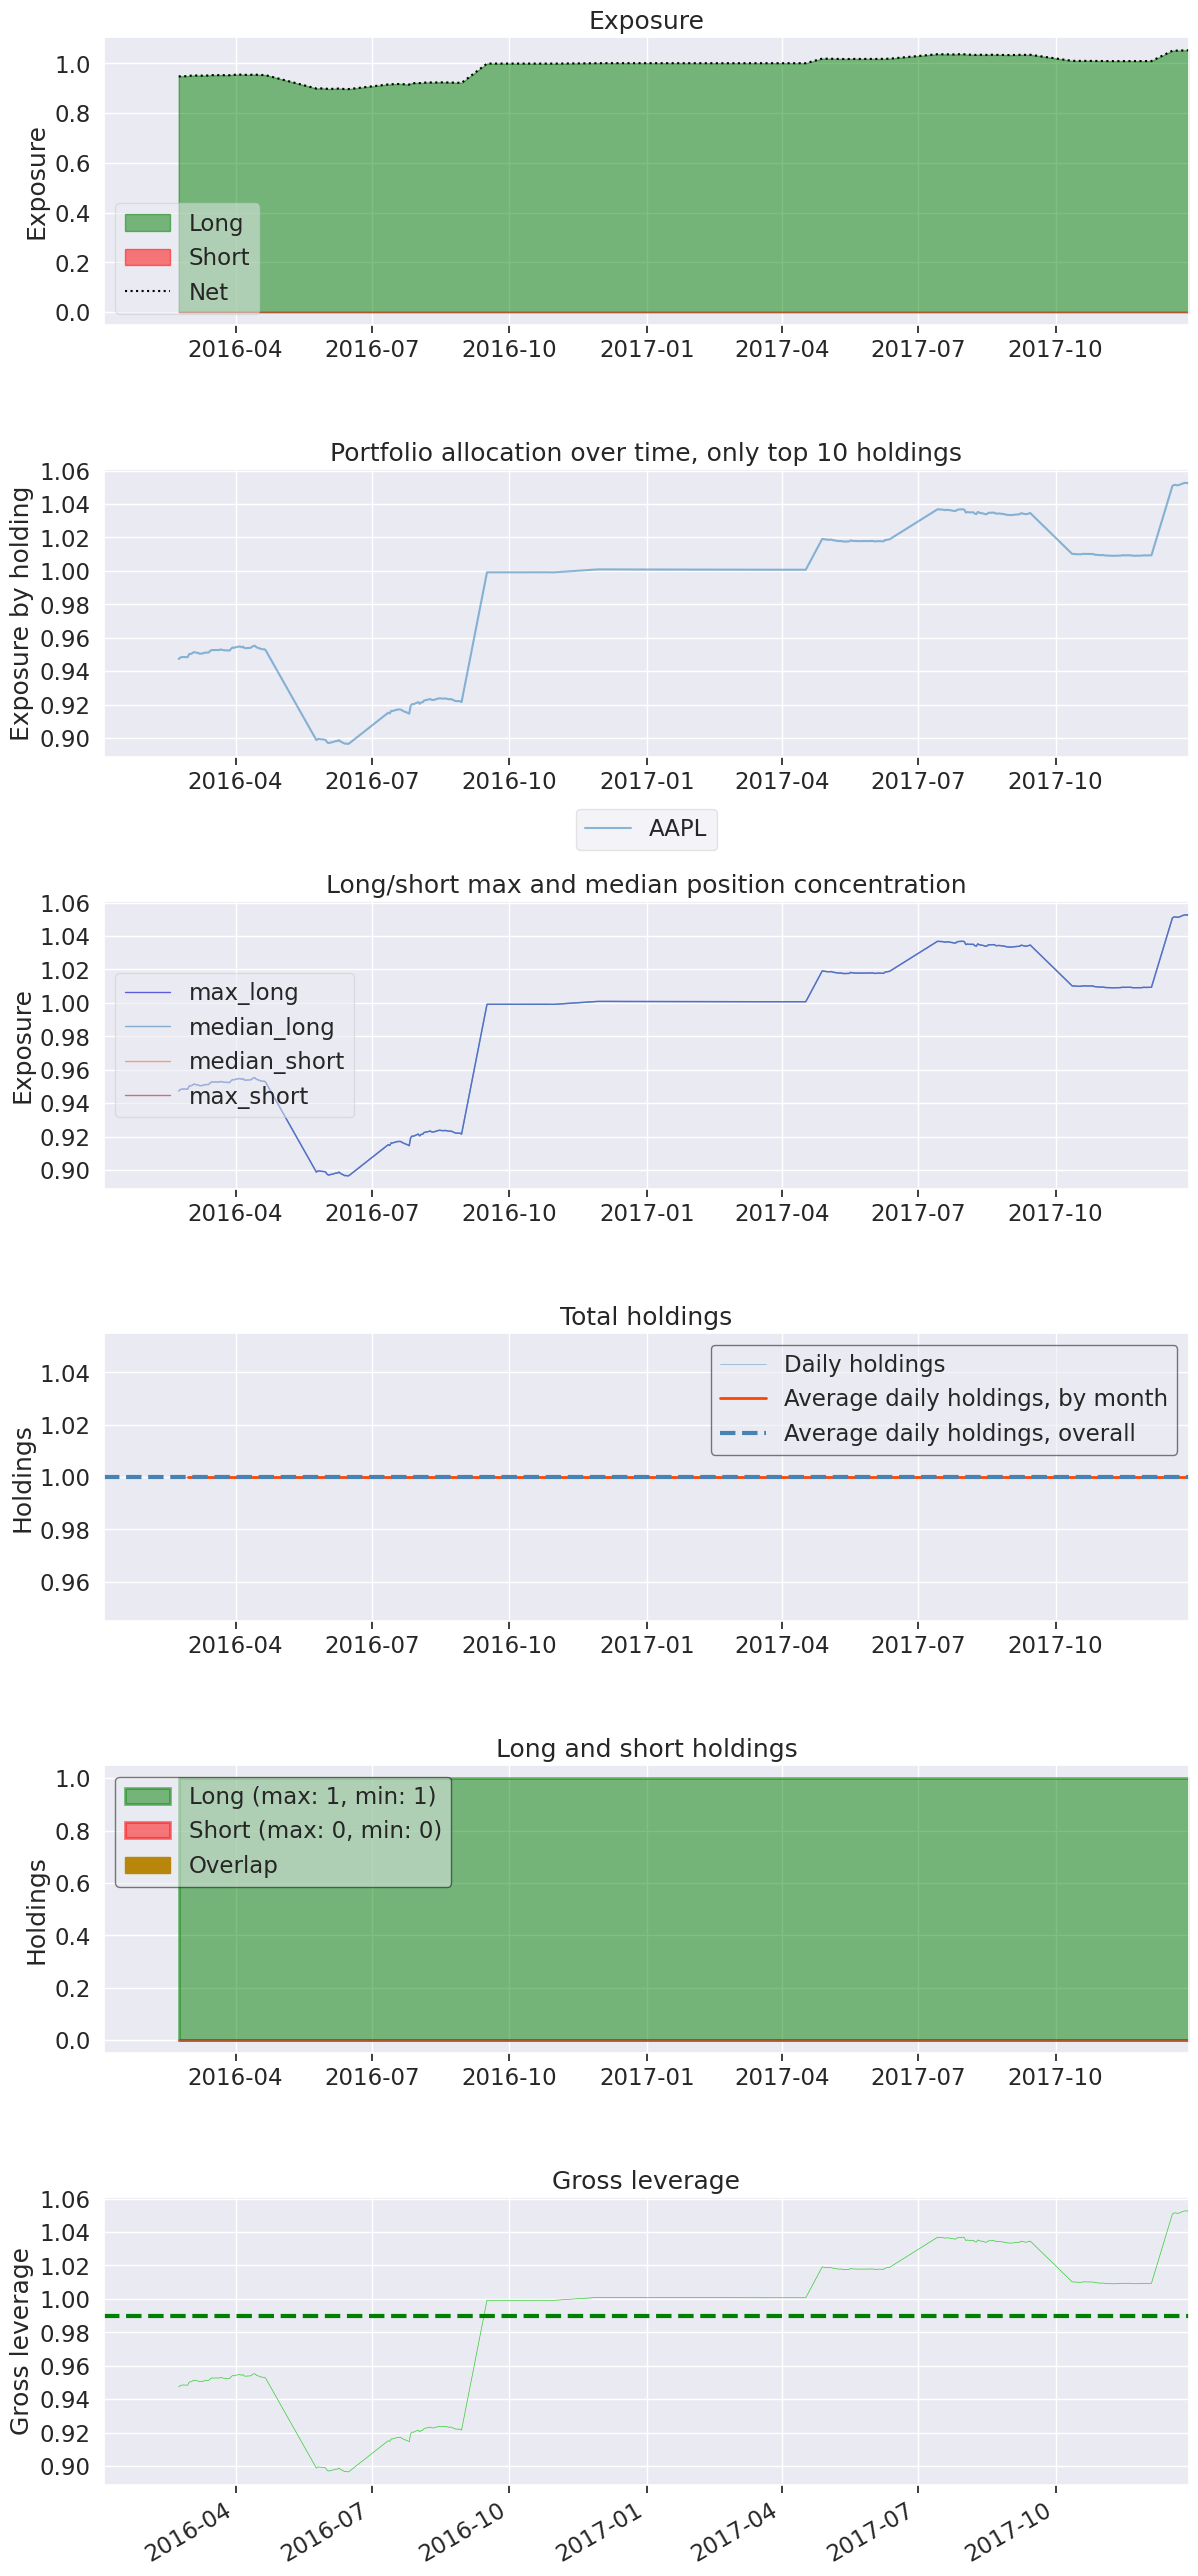

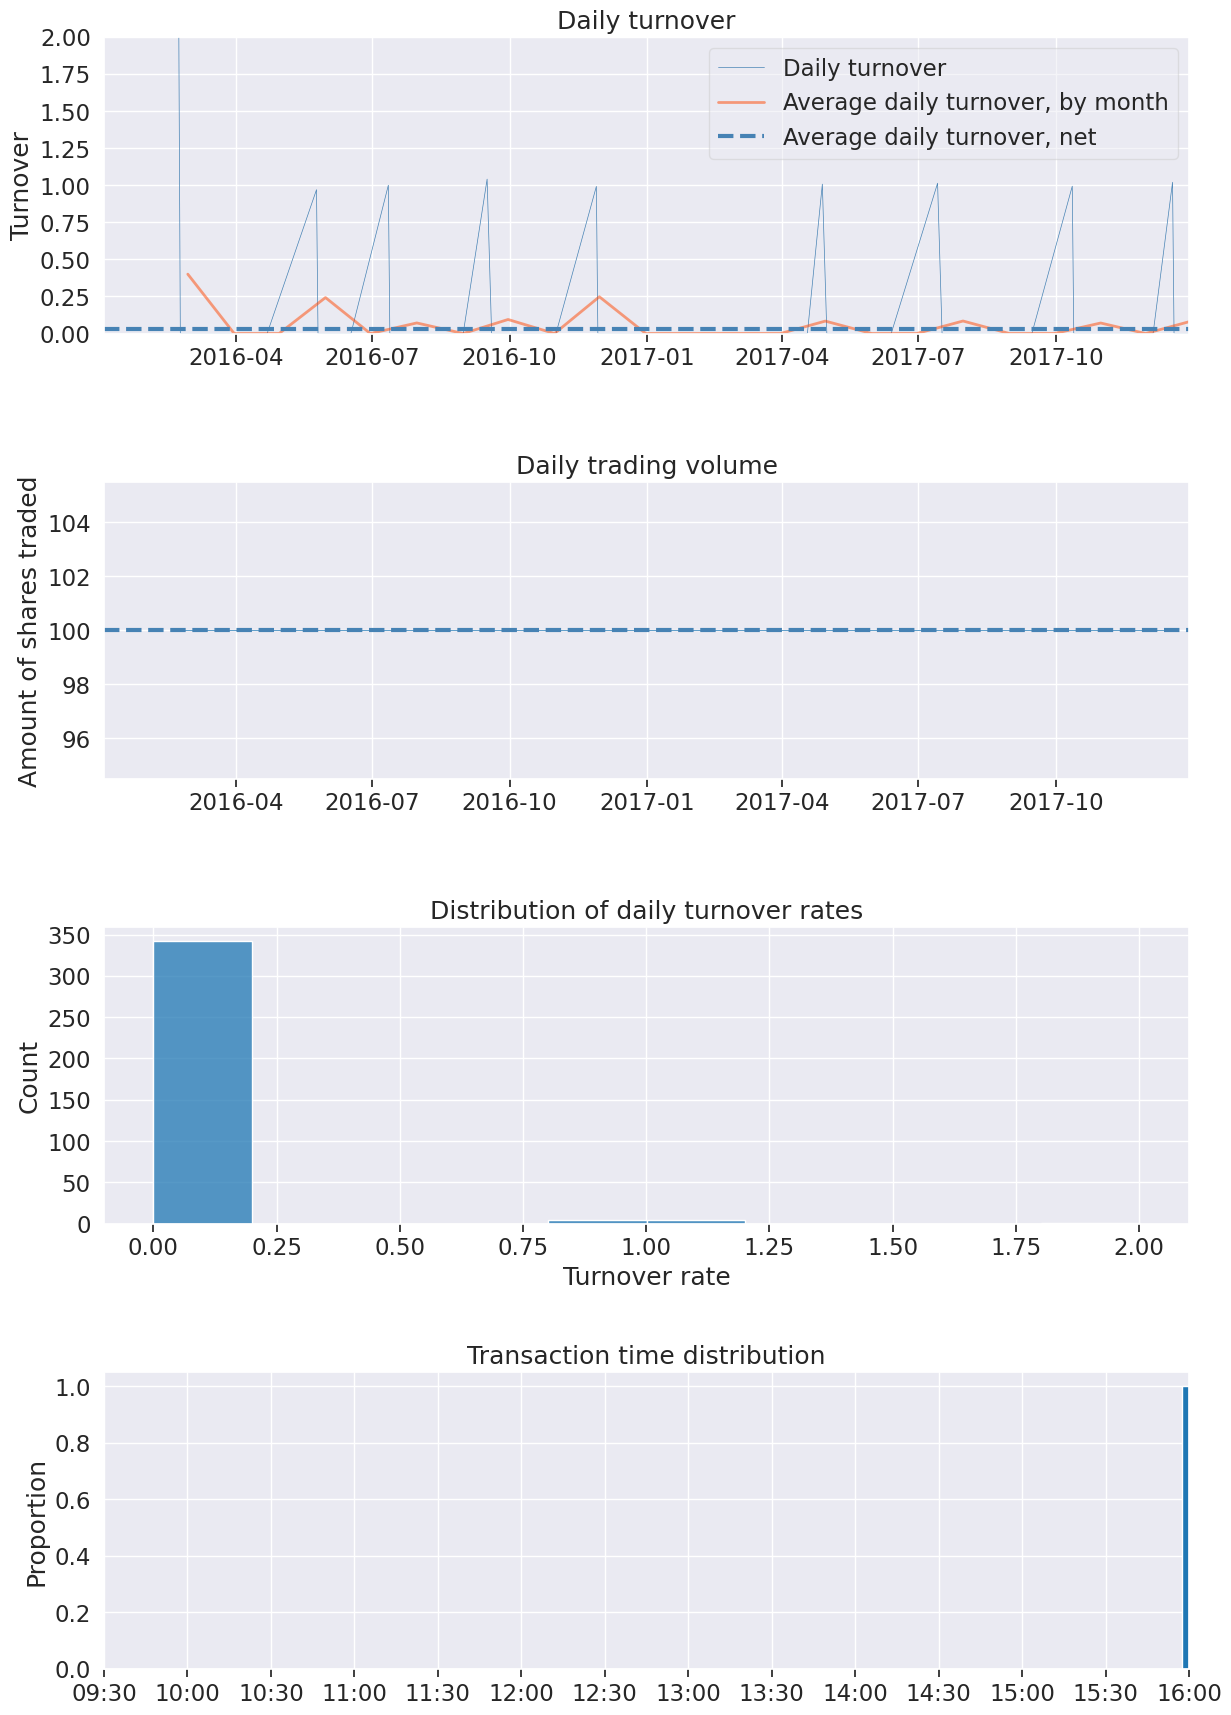

In [9]:
import pyfolio as pf

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(result)


pf.create_full_tear_sheet(returns, positions, transactions)